Курсовая работа

### Библиотеки Python для Data Science: Numpy, Matplotlib, Scikit-learn


#### Задание

Ваша задача этом соревновании - предсказать цены на квартиры в датасете test.csv. Вам будут даны два датасета: train.csv (содержит признаки и цены на квартиры) и test.csv (только признаки).



#### План

1. Подготовка данных (анализ, визуализация, обработка выбросов, пропусков, генерация фичей)
2. Обучение модели
3. Проверка качества модели
4. Отправить файс с предсказаниями на Kaggle и на Private Leaderboard, получить больше 0.6

#### 1. Загрузка данных

In [2927]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from scipy.stats import norm
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error as mae
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2928]:
import warnings
warnings.filterwarnings('ignore')

In [2929]:
matplotlib.rcParams.update({'font.size': 10})  # размер шрифта на графиках

In [2930]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

#### Описание датасета

###### Материалы:
train.csv - the training set
test.csv - the test set
EDorokhova_submissions.csv

In [2931]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'
TEST_DATASET_EXT_PATH = 'EDorokhova_submissions.csv'

In [2932]:
train = pd.read_csv('train.csv', sep=',')
test = pd.read_csv('test.csv', sep=',')
print("Data is loaded!")

Data is loaded!


In [2933]:
train.head(50)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [2934]:
train.tail(2)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808
9999,6306,128,1.0,38.666645,21.157874,8.0,7,17.0,1990,0.000000,B,B,27,4798,0,30.0,2,8,B,218714.077615


Таким образом, имеем тестовую выборку из 10000 квартир, иной вариант посмотреть размер датасета:

In [2935]:
train.shape

(10000, 20)

In [2936]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

###### Статистические данные:
Id - идентификационный номер квартиры

DistrictId - идентификационный номер района

Rooms - количество комнат

Square - площадь

LifeSquare - жилая площадь

KitchenSquare - площадь кухни

Floor - этаж

HouseFloor - количество этажей в доме

HouseYear - год постройки дома

Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности

Social_1, Social_2, Social_3 - социальные показатели местности

Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья

Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров

Price - цена квартиры

In [2937]:
train.index

RangeIndex(start=0, stop=10000, step=1)

In [2938]:
test.tail(2)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A
4999,12504,30,2.0,60.555693,NaN,1.0,10,17.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B


In [2939]:
test.head(20)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
5,7633,53,1.0,40.675627,NaN,1.0,21,21.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
6,13329,23,2.0,68.099538,64.843025,1.0,2,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
7,5502,32,2.0,48.193897,32.857644,6.0,5,14.0,1972,0.135650,B,B,46,7960,6,350.0,3,11,B
8,4220,96,3.0,72.277106,45.968758,9.0,17,17.0,1997,0.041116,B,B,53,14892,4,NaN,1,4,B
9,11538,6,3.0,80.219400,47.660260,9.0,13,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B


In [2940]:
test.shape

(5000, 19)

Таким образом, в тестовой выборке - 5000 квартир

In [2941]:
test.index

RangeIndex(start=0, stop=5000, step=1)

In [2942]:
test.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2'],
      dtype='object')

#### Проверим, точно ли датасеты отличаются только на один признак:

In [2943]:
train.shape[1] - 1 == test.shape[1]

True

In [2944]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


#### Уменьшение объема памяти, который занимает датасет

In [2945]:
def reduce_mem_usage(train):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = train.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in train.columns:
        col_type = train[col].dtype
        
        if col_type != object:
            c_min = train[col].min()
            c_max = train[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    train[col] = train[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    train[col] = train[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    train[col] = train[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    train[col] = train[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    train[col] = train[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    train[col] = train[col].astype(np.float32)
                else:
                    train[col] = train[col].astype(np.float64)
        else:
            train[col] = train[col].astype('category')

    end_mem = train.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return train

In [2946]:
train = reduce_mem_usage(train)

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.35 MB
Decreased by 76.9%


In [2947]:
def reduce_mem_usage(test):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = test.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in test.columns:
        col_type = test[col].dtype
        
        if col_type != object:
            c_min = test[col].min()
            c_max = test[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    test[col] = test[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    test[col] = test[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    test[col] = test[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    test[col] = test[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    test[col] = test[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    test[col] = test[col].astype(np.float32)
                else:
                    test[col] = test[col].astype(np.float64)
        else:
            test[col] = test[col].astype('category')

    end_mem = test.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return test

In [2948]:
test = reduce_mem_usage(test)

Memory usage of dataframe is 0.72 MB
Memory usage after optimization is: 0.15 MB
Decreased by 79.6%


Проверим типы данных датасетов:

In [2949]:
train.dtypes

Id                  int16
DistrictId          int16
Rooms             float16
Square            float16
LifeSquare        float16
KitchenSquare     float16
Floor                int8
HouseFloor        float16
HouseYear           int32
Ecology_1         float16
Ecology_2        category
Ecology_3        category
Social_1             int8
Social_2            int16
Social_3            int16
Healthcare_1      float16
Helthcare_2          int8
Shops_1              int8
Shops_2          category
Price             float32
dtype: object

In [2950]:
test.dtypes

Id                  int16
DistrictId          int16
Rooms             float16
Square            float16
LifeSquare        float16
KitchenSquare     float16
Floor                int8
HouseFloor        float16
HouseYear           int16
Ecology_1         float16
Ecology_2        category
Ecology_3        category
Social_1             int8
Social_2            int16
Social_3            int16
Healthcare_1      float16
Helthcare_2          int8
Shops_1              int8
Shops_2          category
dtype: object

In [2951]:
#### Вывод: в датасетах есть категориальные признаки, которые в дальнейшем преобразуем.

#### 2. EDA Визуализация данных

Целевая переменная

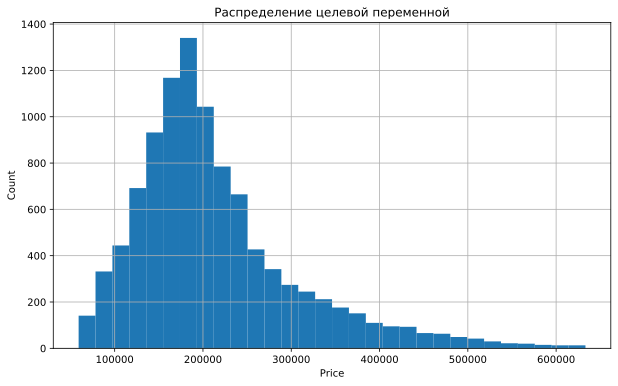

In [2952]:
plt.figure(figsize = (10, 6))

train['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Распределение целевой переменной')
plt.show()

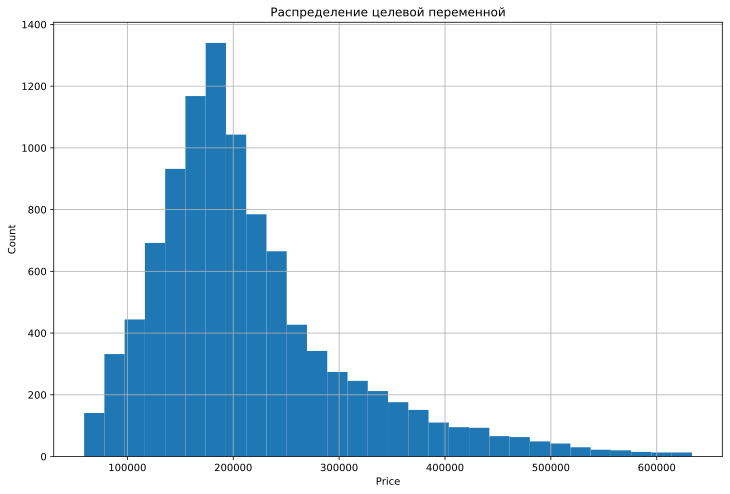

In [2953]:
plt.figure(figsize = (12, 8))

train['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Распределение целевой переменной')
plt.show()

Вывод: Распределение довольно типично для данных по недвижимости: наибольшее количество квартир находится в среднем ценовом сегменте.

In [2954]:
target_mean = round(train['Price'].mean(), 2)
target_median = train['Price'].median()
target_mode = train['Price'].mode()[0]

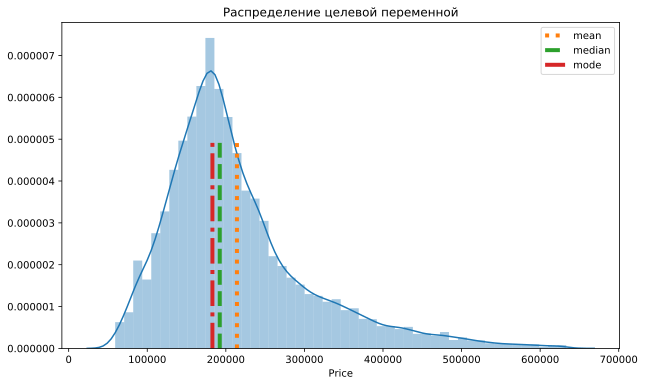

In [2955]:
plt.figure(figsize = (10, 6))

sns.distplot(train['Price'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Распределениe целевой переменной')
plt.legend()
plt.show()

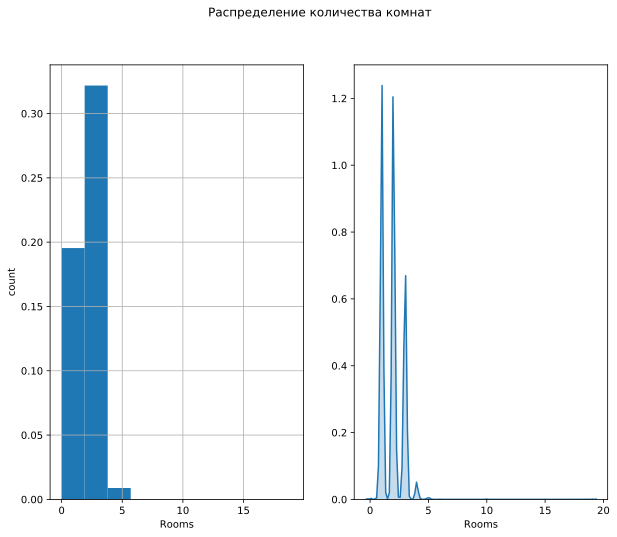

In [2956]:
plt.figure(figsize = (10, 8))

plt.subplot(121)
train['Rooms'].hist(density=True)
plt.ylabel('count')
plt.xlabel('Rooms')

plt.subplot(122)
sns.kdeplot(train['Rooms'], shade=True, legend=False)
plt.xlabel('Rooms')

plt.suptitle('Распределение количества комнат')
plt.show()

Вывод: количество комнат в квартирах - от 1 до 6. Остальное - выбросы.

In [2957]:
train_num_features = train.select_dtypes(include=['float64', 'float32', 'float16'])
train_num_features.drop('Price', axis=1, inplace=True)

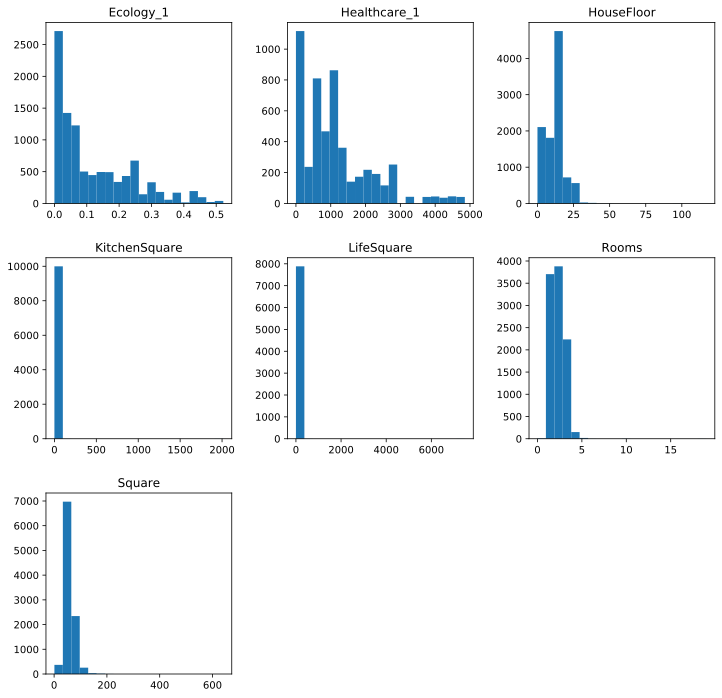

In [2958]:
train_num_features.hist(figsize=(12,12), bins=20, grid=False);

Графики иллюстрируют наличие выбросов в признаках. Следующей задачей будет - избавиться от выбросов.

Сделаем предположение о связи площади квартиры с ее стоимостью:

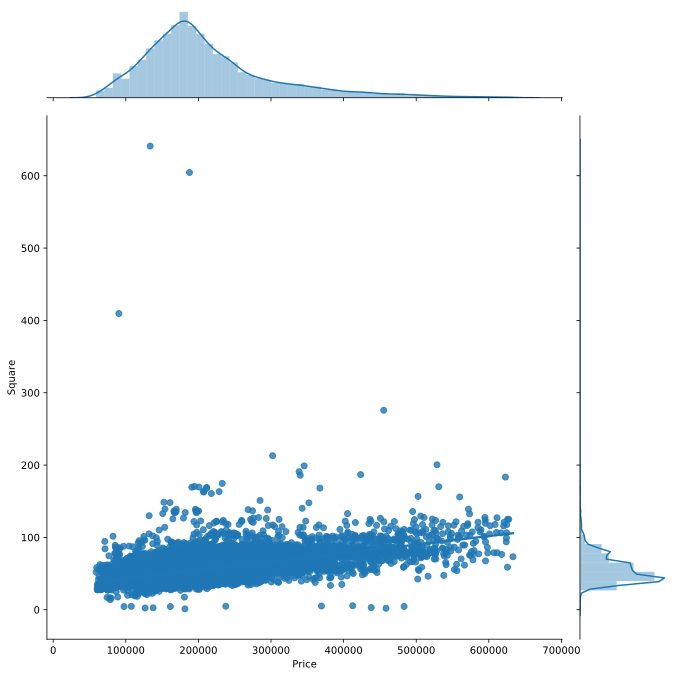

In [2959]:
grid = sns.jointplot(train['Price'], train['Square'], kind='reg')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(10)

plt.show()

Вывод: предположение оправдалось - чем больше метраж, тем выше стоимость квартиры.
Также в верхней части графика видим выбросы - невысокая цена сопровождается большой площадью. Также видим нулевые значение в признаке Square (площадь квартиры)

#### Обзор и преобразование номинативных (категориальных) переменных

In [2960]:
train.select_dtypes(include='object').columns.tolist()

[]

In [2961]:
train_obj_features = train.select_dtypes(include='category')
train_obj_features.head()

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,B


In [2962]:
for column in train_obj_features:
    print('{}\n'.format(train[column].value_counts()))

B    9903
A      97
Name: Ecology_2, dtype: int64

B    9725
A     275
Name: Ecology_3, dtype: int64

B    9175
A     825
Name: Shops_2, dtype: int64



In [2963]:
train.dtypes

Id                  int16
DistrictId          int16
Rooms             float16
Square            float16
LifeSquare        float16
KitchenSquare     float16
Floor                int8
HouseFloor        float16
HouseYear           int32
Ecology_1         float16
Ecology_2        category
Ecology_3        category
Social_1             int8
Social_2            int16
Social_3            int16
Healthcare_1      float16
Helthcare_2          int8
Shops_1              int8
Shops_2          category
Price             float32
dtype: object

In [2964]:
test_obj_features = test.select_dtypes(include='category')
test_obj_features.head()

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,A


In [2965]:
for column in test_obj_features:
    print('{}\n'.format(test[column].value_counts()))

B    4952
A      48
Name: Ecology_2, dtype: int64

B    4851
A     149
Name: Ecology_3, dtype: int64

B    4588
A     412
Name: Shops_2, dtype: int64



In [2966]:
test.dtypes

Id                  int16
DistrictId          int16
Rooms             float16
Square            float16
LifeSquare        float16
KitchenSquare     float16
Floor                int8
HouseFloor        float16
HouseYear           int16
Ecology_1         float16
Ecology_2        category
Ecology_3        category
Social_1             int8
Social_2            int16
Social_3            int16
Healthcare_1      float16
Helthcare_2          int8
Shops_1              int8
Shops_2          category
dtype: object

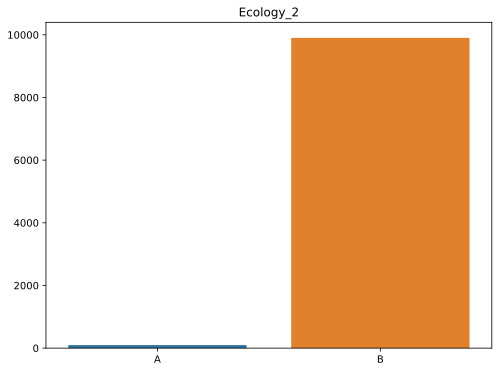

In [2967]:
counts = train['Ecology_2'].value_counts()
    
plt.figure(figsize=(8,6))    
plt.title('Ecology_2')
sns.barplot(counts.index, counts.values)
    
plt.show()

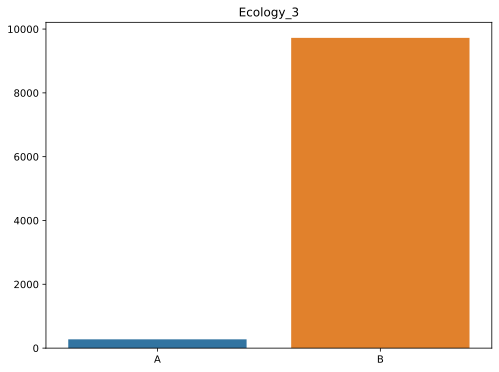

In [2968]:
counts = train['Ecology_3'].value_counts()
    
plt.figure(figsize=(8,6))    
plt.title('Ecology_3')
sns.barplot(counts.index, counts.values)
    
plt.show()

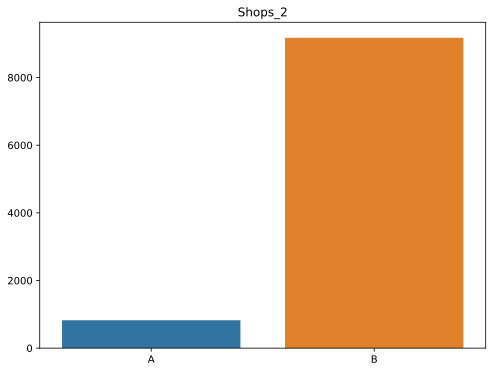

In [2969]:
counts = train['Shops_2'].value_counts()
    
plt.figure(figsize=(8,6))    
plt.title('Shops_2')
sns.barplot(counts.index, counts.values)
    
plt.show()

Посмотрим те признаки, которые близки к категориальным, но не указаны как таковые:

In [2970]:
train['Ecology_1'].value_counts()

0.007122    587
0.000000    547
0.243164    511
0.072144    486
0.075806    346
           ... 
0.386719      6
0.011322      3
0.394043      2
0.014336      1
0.012520      1
Name: Ecology_1, Length: 128, dtype: int64

In [2971]:
train['Shops_1'].value_counts()

0     2316
1     1325
5     1324
2      964
4      841
3      711
6      487
11     401
9      316
7      294
8      253
23     245
10     215
15     176
16      83
19      49
Name: Shops_1, dtype: int64

Датасеты train и test содержат три категориальных признака (Ecology_2, Ecology_3, Shops_2). 

Избавимся от категориальных признаков в train, переведя их в дамми 

In [2972]:
binary_to_numbers = {'A': 0, 'B': 1}

train['Ecology_2'] = train['Ecology_2'].replace(binary_to_numbers)
train['Ecology_3'] = train['Ecology_3'].replace(binary_to_numbers)
train['Shops_2'] = train['Shops_2'].replace(binary_to_numbers)

Посмотрим результаты избавления от категориальных признаков в train

In [2973]:
train.dtypes

Id                 int16
DistrictId         int16
Rooms            float16
Square           float16
LifeSquare       float16
KitchenSquare    float16
Floor               int8
HouseFloor       float16
HouseYear          int32
Ecology_1        float16
Ecology_2          int64
Ecology_3          int64
Social_1            int8
Social_2           int16
Social_3           int16
Healthcare_1     float16
Helthcare_2         int8
Shops_1             int8
Shops_2            int64
Price            float32
dtype: object

##### Избавимся от категориальных признаков в test

In [2974]:
binary_to_numbers = {'A': 0, 'B': 1}

test['Ecology_2'] = test['Ecology_2'].replace(binary_to_numbers)
test['Ecology_3'] = test['Ecology_3'].replace(binary_to_numbers)
test['Shops_2'] = test['Shops_2'].replace(binary_to_numbers)

Посмотрим результаты избавления от категориальных признаков в test

In [2975]:
test.dtypes

Id                 int16
DistrictId         int16
Rooms            float16
Square           float16
LifeSquare       float16
KitchenSquare    float16
Floor               int8
HouseFloor       float16
HouseYear          int16
Ecology_1        float16
Ecology_2          int64
Ecology_3          int64
Social_1            int8
Social_2           int16
Social_3           int16
Healthcare_1     float16
Helthcare_2         int8
Shops_1             int8
Shops_2            int64
dtype: object

Посмотрим результаты избавления от категориальных признаков

In [2976]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int16  
 1   DistrictId     10000 non-null  int16  
 2   Rooms          10000 non-null  float16
 3   Square         10000 non-null  float16
 4   LifeSquare     7887 non-null   float16
 5   KitchenSquare  10000 non-null  float16
 6   Floor          10000 non-null  int8   
 7   HouseFloor     10000 non-null  float16
 8   HouseYear      10000 non-null  int32  
 9   Ecology_1      10000 non-null  float16
 10  Ecology_2      10000 non-null  int64  
 11  Ecology_3      10000 non-null  int64  
 12  Social_1       10000 non-null  int8   
 13  Social_2       10000 non-null  int16  
 14  Social_3       10000 non-null  int16  
 15  Healthcare_1   5202 non-null   float16
 16  Helthcare_2    10000 non-null  int8   
 17  Shops_1        10000 non-null  int8   
 18  Shops_2

In [2977]:
test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int16  
 1   DistrictId     5000 non-null   int16  
 2   Rooms          5000 non-null   float16
 3   Square         5000 non-null   float16
 4   LifeSquare     3959 non-null   float16
 5   KitchenSquare  5000 non-null   float16
 6   Floor          5000 non-null   int8   
 7   HouseFloor     5000 non-null   float16
 8   HouseYear      5000 non-null   int16  
 9   Ecology_1      5000 non-null   float16
 10  Ecology_2      5000 non-null   int64  
 11  Ecology_3      5000 non-null   int64  
 12  Social_1       5000 non-null   int8   
 13  Social_2       5000 non-null   int16  
 14  Social_3       5000 non-null   int16  
 15  Healthcare_1   2623 non-null   float16
 16  Helthcare_2    5000 non-null   int8   
 17  Shops_1        5000 non-null   int8   
 18  Shops_2 

#### Обработка нулевых данных

In [2978]:
train[train['DistrictId'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
20,8862,0,3.0,103.625000,47.812500,10.0,12,17.0,2002,0.319824,1,1,25,4756,16,2856.0,5,8,1,521919.062500
636,14492,0,2.0,62.968750,37.031250,10.0,10,22.0,2007,0.319824,1,1,25,4756,16,2856.0,5,8,1,334328.593750
745,9982,0,3.0,89.625000,49.968750,10.0,1,17.0,2009,0.006077,1,1,30,5285,0,645.0,6,6,1,184968.359375
1188,9302,0,1.0,36.156250,24.281250,5.0,2,5.0,1963,0.319824,1,1,25,4756,16,2856.0,5,8,1,147258.734375
1539,3808,0,3.0,76.562500,52.312500,8.0,4,8.0,1960,0.319824,1,1,25,4756,16,2856.0,5,8,1,339228.812500
1552,2039,0,1.0,30.953125,18.968750,5.0,5,5.0,1974,0.319824,1,1,25,4756,16,2856.0,5,8,1,160762.921875
1572,12558,0,2.0,49.343750,31.515625,5.0,4,5.0,1964,0.319824,1,1,25,4756,16,2856.0,5,8,1,173146.328125
1653,7586,0,2.0,45.656250,30.093750,6.0,4,5.0,1959,0.319824,1,1,25,4756,16,2856.0,5,8,1,221660.250000
1841,5690,0,2.0,44.656250,31.484375,5.0,3,5.0,1964,0.319824,1,1,25,4756,16,2856.0,5,8,1,167238.281250
1891,13685,0,1.0,17.500000,13.445312,0.0,7,5.0,1961,0.319824,1,1,25,4756,16,2856.0,5,8,1,88871.750000


In [2979]:
train.loc[(train['DistrictId'] == 0)] = train['DistrictId'].median()

In [2980]:
train[train['DistrictId'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [2981]:
test[test['DistrictId'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
37,4176,0,2.0,42.96875,29.406250,5.0,5,5.0,1962,0.319824,1,1,25,4756,16,2856.0,5,8,1
514,11567,0,3.0,108.87500,53.437500,13.0,20,19.0,2012,0.006077,1,1,30,5285,0,645.0,6,6,1
1015,6663,0,2.0,46.81250,30.875000,5.0,7,5.0,1962,0.319824,1,1,25,4756,16,2856.0,5,8,1
2006,9778,0,1.0,38.90625,20.609375,10.0,4,12.0,1974,0.006077,1,1,30,5285,0,645.0,6,6,1
2231,6456,0,2.0,37.62500,21.343750,6.0,9,9.0,1967,0.319824,1,1,25,4756,16,2856.0,5,8,1
2474,14316,0,1.0,63.18750,23.250000,12.0,18,19.0,2012,0.006077,1,1,30,5285,0,645.0,6,6,1
2546,14681,0,1.0,47.34375,22.171875,10.0,9,12.0,2005,0.319824,1,1,25,4756,16,2856.0,5,8,1
2831,6607,0,1.0,34.78125,19.937500,5.0,6,5.0,1961,0.319824,1,1,25,4756,16,2856.0,5,8,1
2841,7319,0,1.0,33.50000,17.328125,5.0,4,5.0,1961,0.319824,1,1,25,4756,16,2856.0,5,8,1
2897,11838,0,1.0,41.37500,17.437500,8.0,14,17.0,2011,0.006077,1,1,30,5285,0,645.0,6,6,1


In [2982]:
test.loc[(test['DistrictId'] == 0)] = train['DistrictId'].median()
test[test['DistrictId'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [2983]:
train[train['Rooms'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638.0,27.0,0.0,138.375000,136.250000,0.0,4.0,3.0,2016.0,0.075439,1.0,1.0,11.0,3097.0,0.0,NaN,0.0,0.0,1.0,268394.750000
1981,7917.0,27.0,0.0,212.875000,211.250000,0.0,2.0,3.0,2008.0,0.211426,1.0,1.0,9.0,1892.0,0.0,NaN,0.0,1.0,1.0,302211.250000
2269,7317.0,27.0,0.0,41.781250,NaN,0.0,13.0,0.0,1977.0,0.211426,1.0,1.0,9.0,1892.0,0.0,NaN,0.0,1.0,1.0,98129.976562
3911,770.0,28.0,0.0,49.468750,NaN,0.0,16.0,0.0,2015.0,0.118530,1.0,1.0,30.0,6207.0,1.0,1183.0,1.0,0.0,1.0,217009.343750
4366,456.0,6.0,0.0,81.500000,NaN,0.0,4.0,0.0,1977.0,0.243164,1.0,1.0,5.0,1564.0,0.0,540.0,0.0,0.0,1.0,212864.796875
4853,3224.0,27.0,0.0,2.376953,0.873047,0.0,1.0,0.0,1977.0,0.017654,1.0,1.0,2.0,469.0,0.0,NaN,0.0,0.0,1.0,126596.945312
6149,3159.0,88.0,0.0,38.687500,19.343750,9.0,9.0,16.0,1982.0,0.127319,1.0,1.0,43.0,8429.0,3.0,NaN,3.0,9.0,1.0,158998.109375
8834,9443.0,27.0,0.0,87.750000,85.125000,0.0,5.0,15.0,1977.0,0.211426,1.0,1.0,9.0,1892.0,0.0,NaN,0.0,1.0,1.0,219281.921875


In [2984]:
train.loc[(train['Rooms'] == 0)] = train['Rooms'].median()

In [2985]:
train[train['Rooms'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [2986]:
test[test['Rooms'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2406,3343.0,58.0,0.0,116.8125,113.6875,0.0,3.0,3.0,1977.0,0.437988,1.0,1.0,23.0,5735.0,3.0,1084.0,0.0,5.0,1.0
2524,10729.0,27.0,0.0,76.3750,42.8125,12.0,14.0,0.0,1977.0,0.017654,1.0,1.0,2.0,469.0,0.0,NaN,0.0,0.0,1.0


In [2987]:
test.loc[(test['Rooms'] == 0)] = train['Rooms'].median()
test[test['Rooms'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [2988]:
train[train['Square'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [2989]:
train.loc[(train['Square'] == 0)] = train['Square'].median()

In [2990]:
train[train['Square'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [2991]:
test[test['Square'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [2992]:
test.loc[(test['Square'] == 0)] = train['Square'].median()
test[test['Square'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [2993]:
train[train['LifeSquare'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [2994]:
train.loc[(train['LifeSquare'] == 0)] = train['LifeSquare'].median()

In [2995]:
train[train['LifeSquare'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [2996]:
test[test['LifeSquare'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [2997]:
test.loc[(test['LifeSquare'] == 0)] = train['LifeSquare'].median()
test[test['LifeSquare'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [2998]:
train[train['KitchenSquare'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2,4765.0,53.0,2.0,44.93750,29.203125,0.0,8.0,12.0,1968.0,0.049652,1.0,1.0,34.0,7759.0,0.0,229.0,1.0,3.0,1.0,220925.906250
7,11993.0,74.0,2.0,80.31250,NaN,0.0,14.0,0.0,1977.0,0.075806,1.0,1.0,6.0,1437.0,3.0,NaN,0.0,2.0,1.0,221244.156250
23,6641.0,54.0,3.0,118.93750,NaN,0.0,2.0,0.0,1977.0,0.006077,1.0,1.0,30.0,5285.0,0.0,645.0,6.0,6.0,1.0,571069.062500
26,4378.0,27.0,3.0,106.93750,0.641602,0.0,17.0,0.0,2018.0,0.072144,1.0,1.0,2.0,629.0,1.0,NaN,0.0,0.0,0.0,337299.875000
39,9371.0,23.0,2.0,60.50000,NaN,0.0,16.0,0.0,1977.0,0.034668,1.0,1.0,0.0,168.0,0.0,NaN,0.0,0.0,1.0,229778.062500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9948,8438.0,1.0,2.0,66.75000,NaN,0.0,16.0,17.0,1977.0,0.007122,1.0,1.0,1.0,264.0,0.0,NaN,0.0,1.0,1.0,199237.843750
9953,5365.0,1.0,2.0,61.06250,NaN,0.0,11.0,17.0,1977.0,0.007122,1.0,1.0,1.0,264.0,0.0,NaN,0.0,1.0,1.0,190085.171875
9960,9307.0,1.0,2.0,57.37500,NaN,0.0,8.0,25.0,2016.0,0.007122,1.0,1.0,1.0,264.0,0.0,NaN,0.0,1.0,1.0,104450.500000
9965,6612.0,27.0,2.0,59.46875,NaN,0.0,15.0,19.0,1977.0,0.211426,1.0,1.0,9.0,1892.0,0.0,NaN,0.0,1.0,1.0,135784.328125


In [2999]:
train.loc[(train['KitchenSquare'] == 0)] = train['KitchenSquare'].median()

In [3000]:
train[train['KitchenSquare'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [3001]:
test[test['KitchenSquare'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
22,12694.0,27.0,3.0,83.68750,46.34375,0.0,8.0,0.0,2015.0,0.072144,1.0,1.0,2.0,629.0,1.0,NaN,0.0,0.0,0.0
24,8968.0,27.0,2.0,69.87500,NaN,0.0,3.0,0.0,1977.0,0.011658,1.0,1.0,4.0,915.0,0.0,NaN,0.0,0.0,1.0
30,2982.0,6.0,2.0,63.46875,NaN,0.0,13.0,0.0,1977.0,0.243164,1.0,1.0,5.0,1564.0,0.0,540.0,0.0,0.0,1.0
32,2449.0,1.0,1.0,66.43750,NaN,0.0,14.0,0.0,1977.0,0.007122,1.0,1.0,1.0,264.0,0.0,NaN,0.0,1.0,1.0
43,11513.0,1.0,1.0,37.46875,40.59375,0.0,4.0,17.0,1977.0,0.007122,1.0,1.0,1.0,264.0,0.0,NaN,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,4821.0,74.0,2.0,82.56250,82.56250,0.0,4.0,17.0,2015.0,0.309570,1.0,1.0,35.0,7715.0,4.0,990.0,0.0,6.0,1.0
4973,1804.0,27.0,1.0,38.90625,NaN,0.0,11.0,17.0,1977.0,0.011658,1.0,1.0,4.0,915.0,0.0,NaN,0.0,0.0,1.0
4974,5296.0,52.0,1.0,44.43750,44.62500,0.0,5.0,17.0,1977.0,0.371094,1.0,1.0,34.0,7065.0,1.0,750.0,2.0,5.0,1.0
4976,4723.0,95.0,1.0,45.53125,NaN,0.0,6.0,0.0,1977.0,0.000699,1.0,1.0,14.0,3369.0,24.0,4128.0,0.0,3.0,1.0


In [3002]:
test.loc[(test['KitchenSquare'] == 0)] = train['KitchenSquare'].median()
test[test['KitchenSquare'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [3003]:
train[train['Floor'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [3004]:
train.loc[(train['Floor'] == 0)] = train['Floor'].median()

In [3005]:
train[train['Floor'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [3006]:
test[test['Floor'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [3007]:
test.loc[(test['Floor'] == 0)] = train['Floor'].median()
test[test['Floor'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [3008]:
train[train['HouseFloor'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1724,16033.0,27.0,2.0,62.78125,36.250000,11.0,9.0,0.0,1977.0,0.017654,1.0,1.0,2.0,469.0,0.0,NaN,0.0,0.0,1.0,187244.015625
1788,684.0,27.0,1.0,39.21875,18.968750,11.0,5.0,0.0,1977.0,0.017654,1.0,1.0,2.0,469.0,0.0,NaN,0.0,0.0,1.0,139470.375000
1800,13113.0,27.0,1.0,37.81250,2.228516,11.0,6.0,0.0,2015.0,0.017654,1.0,1.0,2.0,469.0,0.0,NaN,0.0,0.0,1.0,137402.093750
2205,11960.0,34.0,1.0,38.21875,35.156250,10.0,19.0,0.0,1977.0,0.069763,1.0,1.0,53.0,13670.0,4.0,NaN,1.0,11.0,1.0,190443.718750
2206,8417.0,27.0,2.0,60.43750,36.625000,10.0,5.0,0.0,1977.0,0.072144,1.0,1.0,2.0,629.0,1.0,NaN,0.0,0.0,0.0,210750.390625
2566,15333.0,88.0,2.0,66.31250,NaN,11.0,12.0,0.0,1977.0,0.127319,1.0,1.0,43.0,8429.0,3.0,NaN,3.0,9.0,1.0,290791.343750
2763,9947.0,23.0,1.0,29.87500,31.265625,1.0,12.0,0.0,1977.0,0.034668,1.0,1.0,0.0,168.0,0.0,NaN,0.0,0.0,1.0,67898.289062
4133,630.0,6.0,1.0,40.96875,42.562500,1.0,11.0,0.0,1977.0,0.243164,1.0,1.0,5.0,1564.0,0.0,540.0,0.0,0.0,1.0,118505.476562
5118,9256.0,74.0,3.0,113.25000,NaN,1.0,14.0,0.0,1977.0,0.075806,1.0,1.0,6.0,1437.0,3.0,NaN,0.0,2.0,1.0,372244.406250
5222,4644.0,27.0,1.0,45.96875,NaN,9.0,7.0,0.0,1977.0,0.072144,1.0,1.0,2.0,629.0,1.0,NaN,0.0,0.0,0.0,167988.156250


In [3009]:
train.loc[(train['HouseFloor'] == 0)] = train['HouseFloor'].median()

In [3010]:
train[train['HouseFloor'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [3011]:
test[test['HouseFloor'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
320,12041.0,27.0,1.0,45.09375,38.500000,11.0,13.0,0.0,1977.0,0.017654,1.0,1.0,2.0,469.0,0.0,NaN,0.0,0.0,1.0
383,5042.0,58.0,1.0,47.78125,NaN,12.0,11.0,0.0,1977.0,0.437988,1.0,1.0,23.0,5735.0,3.0,1084.0,0.0,5.0,1.0
481,8465.0,1.0,3.0,76.75000,NaN,1.0,16.0,0.0,1977.0,0.007122,1.0,1.0,1.0,264.0,0.0,NaN,0.0,1.0,1.0
643,889.0,27.0,3.0,86.37500,1.307617,1.0,10.0,0.0,1977.0,0.072144,1.0,1.0,2.0,629.0,1.0,NaN,0.0,0.0,0.0
966,1358.0,78.0,2.0,54.21875,31.156250,8.0,6.0,0.0,1998.0,0.092285,1.0,1.0,21.0,4346.0,2.0,165.0,1.0,2.0,1.0
1602,13273.0,62.0,3.0,89.37500,52.687500,11.0,13.0,0.0,1977.0,0.072144,1.0,1.0,2.0,629.0,1.0,NaN,0.0,0.0,0.0
2555,6218.0,1.0,1.0,38.65625,41.843750,1.0,5.0,0.0,1977.0,0.007122,1.0,1.0,1.0,264.0,0.0,NaN,0.0,1.0,1.0
3041,5860.0,1.0,1.0,49.12500,NaN,1.0,5.0,0.0,1977.0,0.007122,1.0,1.0,1.0,264.0,0.0,NaN,0.0,1.0,1.0
3530,7751.0,27.0,2.0,64.43750,NaN,7.0,8.0,0.0,1977.0,0.017654,1.0,1.0,2.0,469.0,0.0,NaN,0.0,0.0,1.0
3782,1346.0,27.0,3.0,87.18750,85.625000,11.0,7.0,0.0,1977.0,0.072144,1.0,1.0,2.0,629.0,1.0,NaN,0.0,0.0,0.0


In [3012]:
test.loc[(test['HouseFloor'] == 0)] = train['HouseFloor'].median()
test[test['HouseFloor'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [3013]:
train[train['HouseYear'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [3014]:
train.loc[(train['HouseYear'] == 0)] = train['HouseYear'].median()

In [3015]:
train[train['HouseYear'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [3016]:
test[test['HouseYear'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [3017]:
test.loc[(test['HouseYear'] == 0)] = train['HouseYear'].median()
test[test['HouseYear'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [3018]:
train[train['Price'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [3019]:
train.loc[(train['Price'] == 0)] = train['Price'].median()

In [3020]:
train[train['Price'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [3021]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725.0,58.0,2.0,49.875000,33.437500,6.0,6.0,14.0,1972.0,0.310303,1.0,1.0,11.0,2748.0,1.0,NaN,0.0,0.0,1.0
1,15856.0,74.0,2.0,69.250000,NaN,1.0,6.0,1.0,1977.0,0.075806,1.0,1.0,6.0,1437.0,3.0,NaN,0.0,2.0,1.0
2,5480.0,190.0,1.0,13.601562,15.945312,12.0,2.0,5.0,1909.0,0.000000,1.0,1.0,30.0,7538.0,87.0,4704.0,5.0,5.0,1.0
3,15664.0,47.0,2.0,73.062500,51.937500,9.0,22.0,22.0,2007.0,0.101868,1.0,1.0,23.0,4583.0,3.0,NaN,3.0,3.0,1.0
4,14275.0,27.0,1.0,47.531250,43.375000,1.0,17.0,17.0,2017.0,0.072144,1.0,1.0,2.0,629.0,1.0,NaN,0.0,0.0,0.0


##### Работа с выбросами

In [3022]:
train['DistrictId'].sort_values(ascending=False)

7650    209.0
1210    208.0
2931    208.0
3443    207.0
7553    205.0
        ...  
4334      1.0
4356      1.0
9652      1.0
4379      1.0
799       1.0
Name: DistrictId, Length: 10000, dtype: float64

In [3023]:
train[(train['DistrictId'] < 0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [3024]:
test['DistrictId'].sort_values(ascending=False)

51      212.0
2666    211.0
1043    210.0
3194    209.0
4719    209.0
        ...  
462       1.0
461       1.0
460       1.0
2147      1.0
4354      1.0
Name: DistrictId, Length: 5000, dtype: float64

In [3025]:
test[(test['DistrictId'] < 0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [3026]:
train['Rooms'].sort_values(ascending=False)

2444    36.0
20      36.0
9876    36.0
5220    36.0
1552    36.0
        ... 
5050     1.0
5052     1.0
5053     1.0
5055     1.0
4999     1.0
Name: Rooms, Length: 10000, dtype: float16

In [3027]:
train[(train['Rooms'] < 1) | (train['Rooms'] > 6)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
20,36.0,36.0,36.0,36.0000,36.00000,36.0,36.0,36.0,36.0,36.00000,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0000
377,5927.0,57.0,10.0,59.0625,36.21875,10.0,22.0,22.0,2002.0,0.09082,1.0,1.0,74.0,19083.0,2.0,NaN,5.0,15.0,1.0,317265.3125
636,36.0,36.0,36.0,36.0000,36.00000,36.0,36.0,36.0,36.0,36.00000,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0000
745,36.0,36.0,36.0,36.0000,36.00000,36.0,36.0,36.0,36.0,36.00000,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0000
1188,36.0,36.0,36.0,36.0000,36.00000,36.0,36.0,36.0,36.0,36.00000,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9701,36.0,36.0,36.0,36.0000,36.00000,36.0,36.0,36.0,36.0,36.00000,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0000
9840,36.0,36.0,36.0,36.0000,36.00000,36.0,36.0,36.0,36.0,36.00000,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0000
9876,36.0,36.0,36.0,36.0000,36.00000,36.0,36.0,36.0,36.0,36.00000,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0000
9921,36.0,36.0,36.0,36.0000,36.00000,36.0,36.0,36.0,36.0,36.00000,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0000


In [3028]:
train.loc[(train['Rooms'] < 1) | (train['Rooms'] > 6), 'Rooms'] = train['Rooms'].median()

In [3029]:
train[(train['Rooms'] < 1) | (train['Rooms'] > 6)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [3030]:
test['Rooms'].sort_values(ascending=False)

514     36.0
2841    36.0
1015    36.0
37      36.0
2231    36.0
        ... 
3575     1.0
1497     1.0
3573     1.0
3570     1.0
3789     1.0
Name: Rooms, Length: 5000, dtype: float16

In [3031]:
test[(train['Rooms'] < 1) | (test['Rooms'] > 6)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
37,36.0,36.0,36.0,36.000,36.00000,36.0,36.0,36.0,36.0,36.000000,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0
320,12.0,12.0,12.0,12.000,12.00000,12.0,12.0,12.0,12.0,12.000000,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
383,12.0,12.0,12.0,12.000,12.00000,12.0,12.0,12.0,12.0,12.000000,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
481,12.0,12.0,12.0,12.000,12.00000,12.0,12.0,12.0,12.0,12.000000,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
514,36.0,36.0,36.0,36.000,36.00000,36.0,36.0,36.0,36.0,36.000000,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0
643,12.0,12.0,12.0,12.000,12.00000,12.0,12.0,12.0,12.0,12.000000,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
966,12.0,12.0,12.0,12.000,12.00000,12.0,12.0,12.0,12.0,12.000000,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
1015,36.0,36.0,36.0,36.000,36.00000,36.0,36.0,36.0,36.0,36.000000,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0
1602,12.0,12.0,12.0,12.000,12.00000,12.0,12.0,12.0,12.0,12.000000,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
2006,36.0,36.0,36.0,36.000,36.00000,36.0,36.0,36.0,36.0,36.000000,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0


In [3032]:
test.loc[(train['Rooms'] < 1) | (test['Rooms'] > 6), 'Rooms'] = train['Rooms'].median()
test[(train['Rooms'] < 1) | (test['Rooms'] > 6)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [3033]:
train['Square'].sort_values(ascending=False)

6977    641.000000
4262    604.500000
4690    409.500000
1982    275.750000
9910    200.375000
           ...    
3911      2.000000
4366      2.000000
8834      2.000000
8283      1.989258
6392      1.136719
Name: Square, Length: 10000, dtype: float16

In [3034]:
train[(train['Square'] <= 12) | (train['Square'] >= 110)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2,6.0,6.0,6.0,6.0000,6.0,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0000
7,6.0,6.0,6.0,6.0000,6.0,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0000
19,4909.0,19.0,3.0,110.9375,57.0,11.0,16.0,25.0,2012.0,0.000992,1.0,1.0,33.0,6783.0,3.0,NaN,1.0,9.0,1.0,394895.3125
23,6.0,6.0,6.0,6.0000,6.0,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0000
26,6.0,6.0,6.0,6.0000,6.0,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9948,6.0,6.0,6.0,6.0000,6.0,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0000
9953,6.0,6.0,6.0,6.0000,6.0,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0000
9960,6.0,6.0,6.0,6.0000,6.0,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0000
9965,6.0,6.0,6.0,6.0000,6.0,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0000


In [3035]:
train.loc[(train['Square'] < 12) | (train['Square'] > 110), 'Square'] = train['Square'].median()

In [3036]:
train[(train['Square'] < 12) | (train['Square'] > 110)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [3037]:
test['Square'].sort_values(ascending=False)

3217    223.500000
3909    221.125000
1499    189.625000
1264    174.000000
2039    170.500000
           ...    
4490      2.373047
2406      2.000000
2524      2.000000
4902      1.975586
66        1.378906
Name: Square, Length: 5000, dtype: float16

In [3038]:
test[(test['Square'] < 12) | (test['Square'] > 110)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
22,6.0,6.0,6.0,6.000,6.0000,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
24,6.0,6.0,6.0,6.000,6.0000,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
30,6.0,6.0,6.0,6.000,6.0000,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
32,6.0,6.0,6.0,6.000,6.0000,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
43,6.0,6.0,6.0,6.000,6.0000,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,6.0,6.0,6.0,6.000,6.0000,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
4974,6.0,6.0,6.0,6.000,6.0000,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
4975,5346.0,53.0,4.0,110.375,77.6875,20.0,9.0,24.0,2018.0,0.049652,1.0,1.0,34.0,7759.0,0.0,229.0,1.0,3.0,1.0
4976,6.0,6.0,6.0,6.000,6.0000,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


In [3039]:
test.loc[(test['Square'] < 12) | (test['Square'] > 110), 'Square'] = train['Square'].median()
test[(test['Square'] < 12) | (test['Square'] > 110)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [3040]:
train['LifeSquare'].sort_values(ascending=False)

4328    7480.00
6977     638.00
8437     461.50
4690     410.75
590      263.50
         ...   
9978        NaN
9985        NaN
9986        NaN
9994        NaN
9997        NaN
Name: LifeSquare, Length: 10000, dtype: float16

In [3041]:
train[(train['LifeSquare'] <= 7) | (train['LifeSquare'] > 100)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2,6.0,6.0,6.0,49.1875,6.0000,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.00000
7,6.0,6.0,6.0,49.1875,6.0000,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.00000
23,6.0,6.0,6.0,49.1875,6.0000,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.00000
26,6.0,6.0,6.0,49.1875,6.0000,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.00000
39,6.0,6.0,6.0,49.1875,6.0000,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,6.0,6.0,6.0,49.1875,6.0000,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.00000
9954,583.0,27.0,3.0,84.2500,4.1875,1.0,15.0,1.0,2016.0,0.072144,1.0,1.0,2.0,629.0,1.0,NaN,0.0,0.0,0.0,236647.78125
9960,6.0,6.0,6.0,49.1875,6.0000,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.00000
9965,6.0,6.0,6.0,49.1875,6.0000,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.00000


In [3042]:
train.loc[(train['LifeSquare'] <= 7) | (train['LifeSquare'] >= 100)] = train['LifeSquare'].median()

In [3043]:
train[(train['LifeSquare'] <= 7) | (train['LifeSquare'] >= 100)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [3044]:
test['LifeSquare'].sort_values(ascending=False)

410     303.0000
2115    128.8750
2594    128.2500
1991    126.5000
830     122.5625
          ...   
4956         NaN
4963         NaN
4985         NaN
4987         NaN
4999         NaN
Name: LifeSquare, Length: 5000, dtype: float16

In [3045]:
test[(test['LifeSquare'] <= 7) | (test['LifeSquare'] >= 100)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
18,3495.0,27.0,3.0,82.6250,5.691406,1.0,4.0,17.0,2015.0,0.072144,1.0,1.0,2.0,629.0,1.0,NaN,0.0,0.0,0.0
22,6.0,6.0,6.0,49.1875,6.000000,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
24,6.0,6.0,6.0,49.1875,6.000000,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
30,6.0,6.0,6.0,49.1875,6.000000,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
32,6.0,6.0,6.0,49.1875,6.000000,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,6.0,6.0,6.0,49.1875,6.000000,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
4973,6.0,6.0,6.0,49.1875,6.000000,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
4974,6.0,6.0,6.0,49.1875,6.000000,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
4976,6.0,6.0,6.0,49.1875,6.000000,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


In [3046]:
test.loc[(test['LifeSquare'] <= 7) | (test['LifeSquare'] >= 100)] = train['LifeSquare'].median()
test[(test['LifeSquare'] <= 7) | (test['LifeSquare'] >= 100)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [3047]:
train[(train['Square'] < train['LifeSquare'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
19,4909.0,19.0,3.0,49.18750,57.00000,11.0,16.0,25.0,2012.0,0.000992,1.0,1.0,33.0,6783.0,3.0,NaN,1.0,9.0,1.0,394895.312500
28,8054.0,23.0,1.0,42.53125,43.96875,1.0,3.0,9.0,2014.0,0.034668,1.0,1.0,0.0,168.0,0.0,NaN,0.0,0.0,1.0,95338.195312
123,8753.0,25.0,3.0,85.93750,89.81250,1.0,4.0,3.0,2017.0,0.069763,1.0,1.0,53.0,13670.0,4.0,NaN,1.0,11.0,1.0,309688.593750
132,3428.0,108.0,3.0,49.18750,59.28125,12.0,19.0,28.0,2007.0,0.019516,1.0,1.0,37.0,7687.0,11.0,176.0,5.0,5.0,1.0,146061.734375
153,9870.0,62.0,1.0,51.84375,53.50000,1.0,5.0,1.0,2015.0,0.072144,1.0,1.0,2.0,629.0,1.0,NaN,0.0,0.0,0.0,131797.468750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9864,8807.0,38.0,1.0,46.90625,49.71875,10.0,8.0,17.0,2019.0,0.060760,1.0,1.0,15.0,2787.0,2.0,520.0,0.0,7.0,1.0,256650.656250
9871,6121.0,48.0,1.0,41.78125,41.93750,1.0,17.0,1.0,2014.0,0.041138,1.0,1.0,46.0,9515.0,5.0,NaN,1.0,10.0,1.0,200879.625000
9884,41.0,30.0,2.0,59.03125,59.43750,12.0,5.0,5.0,2016.0,0.000078,1.0,1.0,22.0,6398.0,141.0,1046.0,3.0,23.0,1.0,126281.140625
9889,12918.0,23.0,2.0,51.43750,53.12500,51.0,3.0,17.0,2017.0,0.005768,1.0,1.0,1.0,388.0,0.0,NaN,0.0,0.0,1.0,88150.015625


In [3048]:
train.loc[(train['Square'] < train['LifeSquare']), 'LifeSquare'] = train['Square']

In [3049]:
train[(train['Square'] < train['LifeSquare'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [3050]:
test[(test['Square'] < test['LifeSquare'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2,5480.0,190.0,1.0,13.601562,15.945312,12.0,2.0,5.0,1909.0,0.000000,1.0,1.0,30.0,7538.0,87.0,4704.0,5.0,5.0,1.0
27,11160.0,58.0,1.0,48.625000,48.750000,1.0,4.0,3.0,1977.0,0.437988,1.0,1.0,23.0,5735.0,3.0,1084.0,0.0,5.0,1.0
39,6624.0,27.0,1.0,42.406250,42.437500,10.0,12.0,17.0,2017.0,0.011658,1.0,1.0,4.0,915.0,0.0,NaN,0.0,0.0,1.0
70,1872.0,30.0,2.0,52.437500,52.812500,1.0,17.0,17.0,2016.0,0.000078,1.0,1.0,22.0,6398.0,141.0,1046.0,3.0,23.0,1.0
102,10749.0,6.0,2.0,65.562500,66.687500,1.0,4.0,2.0,2017.0,0.243164,1.0,1.0,5.0,1564.0,0.0,540.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4814,1630.0,62.0,2.0,77.812500,80.937500,10.0,12.0,17.0,2015.0,0.072144,1.0,1.0,2.0,629.0,1.0,NaN,0.0,0.0,0.0
4927,14686.0,1.0,3.0,77.250000,79.937500,1.0,18.0,17.0,1977.0,0.007122,1.0,1.0,1.0,264.0,0.0,NaN,0.0,1.0,1.0
4951,3711.0,94.0,1.0,41.281250,42.406250,10.0,13.0,13.0,2014.0,0.282715,1.0,1.0,33.0,8667.0,2.0,NaN,0.0,6.0,1.0
4962,5820.0,94.0,1.0,33.687500,34.187500,1.0,10.0,9.0,1972.0,0.127319,1.0,1.0,43.0,8429.0,3.0,NaN,3.0,9.0,1.0


In [3051]:
test.loc[(test['Square'] < test['LifeSquare']), 'LifeSquare'] = test['Square']
test[(test['Square'] < test['LifeSquare'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [3052]:
train['KitchenSquare'].sort_values(ascending=False)

1064    2014.0
8584    1970.0
2916      96.0
7088      84.0
1455      78.0
         ...  
6992       1.0
3919       1.0
3920       1.0
1789       1.0
5669       1.0
Name: KitchenSquare, Length: 10000, dtype: float16

In [3053]:
train[(train['KitchenSquare'] <= 3) | (train['KitchenSquare'] >= 50)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8,5172.0,1.0,2.0,64.50000,NaN,1.0,9.0,17.0,1977.0,0.007122,1.0,1.0,1.0,264.0,0.0,NaN,0.0,1.0,1.0,229102.796875
12,6452.0,13.0,2.0,54.53125,31.765625,1.0,8.0,12.0,1999.0,0.090820,1.0,1.0,74.0,19083.0,2.0,NaN,5.0,15.0,1.0,229220.375000
14,10953.0,27.0,1.0,53.78125,52.406250,1.0,5.0,4.0,1977.0,0.072144,1.0,1.0,2.0,629.0,1.0,NaN,0.0,0.0,0.0,140647.562500
21,11935.0,27.0,2.0,64.68750,NaN,1.0,15.0,1.0,1977.0,0.211426,1.0,1.0,9.0,1892.0,0.0,NaN,0.0,1.0,1.0,127200.023438
25,5073.0,74.0,2.0,82.68750,NaN,1.0,16.0,17.0,1977.0,0.075806,1.0,1.0,6.0,1437.0,3.0,NaN,0.0,2.0,1.0,244145.828125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,2705.0,6.0,2.0,64.31250,61.906250,1.0,12.0,17.0,2015.0,0.243164,1.0,1.0,5.0,1564.0,0.0,540.0,0.0,0.0,1.0,164356.218750
9985,16159.0,27.0,1.0,38.96875,NaN,1.0,10.0,1.0,1977.0,0.211426,1.0,1.0,9.0,1892.0,0.0,NaN,0.0,1.0,1.0,95529.570312
9986,2996.0,1.0,2.0,65.00000,NaN,1.0,9.0,22.0,1977.0,0.007122,1.0,1.0,1.0,264.0,0.0,NaN,0.0,1.0,1.0,200332.515625
9994,4158.0,23.0,2.0,64.87500,NaN,1.0,17.0,17.0,1977.0,0.075806,1.0,1.0,6.0,1437.0,3.0,NaN,0.0,2.0,1.0,171323.515625


In [3054]:
train.loc[(train['KitchenSquare'] <= 3) | (train['KitchenSquare'] >= 50), 'KitchenSquare'] = train['KitchenSquare'].median()

In [3055]:
train[(train['KitchenSquare'] <= 3) | (train['KitchenSquare'] >= 50)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [3056]:
test['KitchenSquare'].sort_values(ascending=False)

1964    620.0
4555     97.0
1456     65.0
4281     62.0
40       61.0
        ...  
1164      1.0
3387      1.0
3383      1.0
1169      1.0
4999      1.0
Name: KitchenSquare, Length: 5000, dtype: float16

In [3057]:
test[(test['KitchenSquare'] <= 3) | (test['KitchenSquare'] >= 50)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1,15856.0,74.0,2.0,69.25000,NaN,1.0,6.0,1.0,1977.0,0.075806,1.0,1.0,6.0,1437.0,3.0,NaN,0.0,2.0,1.0
4,14275.0,27.0,1.0,47.53125,43.3750,1.0,17.0,17.0,2017.0,0.072144,1.0,1.0,2.0,629.0,1.0,NaN,0.0,0.0,0.0
5,7633.0,53.0,1.0,40.68750,NaN,1.0,21.0,21.0,1977.0,0.049652,1.0,1.0,34.0,7759.0,0.0,229.0,1.0,3.0,1.0
6,13329.0,23.0,2.0,68.12500,64.8125,1.0,2.0,17.0,1977.0,0.075806,1.0,1.0,6.0,1437.0,3.0,NaN,0.0,2.0,1.0
11,3310.0,6.0,3.0,84.62500,NaN,1.0,6.0,17.0,1977.0,0.243164,1.0,1.0,5.0,1564.0,0.0,540.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4972,16064.0,30.0,1.0,38.37500,37.0000,1.0,2.0,1.0,1977.0,0.000078,1.0,1.0,22.0,6398.0,141.0,1046.0,3.0,23.0,1.0
4982,12920.0,23.0,1.0,39.62500,38.1875,1.0,6.0,18.0,2013.0,0.034668,1.0,1.0,0.0,168.0,0.0,NaN,0.0,0.0,1.0
4985,11732.0,1.0,1.0,46.59375,NaN,1.0,17.0,24.0,1977.0,0.007122,1.0,1.0,1.0,264.0,0.0,NaN,0.0,1.0,1.0
4987,5361.0,53.0,3.0,80.12500,NaN,1.0,13.0,22.0,1977.0,0.049652,1.0,1.0,34.0,7759.0,0.0,229.0,1.0,3.0,1.0


In [3058]:
test.loc[(test['KitchenSquare'] <= 3) | (test['KitchenSquare'] >= 50), 'KitchenSquare'] = train['KitchenSquare'].median()
test[(test['KitchenSquare'] <= 3) | (test['KitchenSquare'] >= 50)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [3059]:
train['Floor'].sort_values(ascending=False)

2781    42.0
2268    36.0
9921    36.0
1572    36.0
7885    36.0
        ... 
4276     1.0
8982     1.0
1775     1.0
6867     1.0
4080     1.0
Name: Floor, Length: 10000, dtype: float64

In [3073]:
train[train['Floor'] < 1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [3074]:
train.loc[(train['Floor'] < 1)] = train['Floor'].median()
train[train['Floor'] < 1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [3075]:
test['Floor'].sort_values(ascending=False)

4698    78.0
3711    46.0
1587    38.0
37      36.0
3298    36.0
        ... 
3745     1.0
1020     1.0
631      1.0
3809     1.0
4182     1.0
Name: Floor, Length: 5000, dtype: float64

In [3076]:
test[test['Floor'] < 1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [3077]:
test.loc[(test['Floor'] < 1)] = train['Floor'].median()
test[train['Floor'] < 1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [3078]:
train['HouseFloor'].sort_values(ascending=False)

2781    48.0
7728    48.0
540     45.0
4323    44.0
5494    40.0
        ... 
3304     1.0
7236     1.0
3300     1.0
7257     1.0
5471     1.0
Name: HouseFloor, Length: 10000, dtype: float16

In [3086]:
train[(train['HouseFloor'] < 1) | (train['HouseFloor'] > 75)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [3087]:
train.loc[(train['HouseFloor'] < 1) | (train['HouseFloor'] > 75)] = train['HouseFloor'].median()

In [3088]:
train[(train['HouseFloor'] < 1) | (train['HouseFloor'] > 75)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [3089]:
test['HouseFloor'].sort_values(ascending=False)

3711    48.0
1587    48.0
569     40.0
3576    40.0
2254    40.0
        ... 
1206     1.0
1214     1.0
2832     1.0
1238     1.0
1183     1.0
Name: HouseFloor, Length: 5000, dtype: float16

In [3090]:
test[(test['HouseFloor'] < 1) | (test['HouseFloor'] > 75)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [3091]:
test.loc[(test['HouseFloor'] < 1) | (test['HouseFloor'] > 75)] = train['HouseFloor'].median()
test[test['HouseFloor'] < 1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [3092]:
train[(train['Floor'] > train['HouseFloor'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
14,10953.0,27.0,1.0,53.78125,52.406250,7.0,5.0,4.0,1977.0,0.072144,1.0,1.0,2.0,629.0,1.0,NaN,0.0,0.0,0.0,140647.562500
16,2119.0,27.0,2.0,49.37500,32.000000,5.0,6.0,5.0,1983.0,0.051819,1.0,1.0,5.0,1227.0,0.0,NaN,0.0,0.0,1.0,117000.382812
21,11935.0,27.0,2.0,64.68750,NaN,7.0,15.0,1.0,1977.0,0.211426,1.0,1.0,9.0,1892.0,0.0,NaN,0.0,1.0,1.0,127200.023438
35,6486.0,200.0,3.0,85.25000,58.437500,9.0,6.0,5.0,1960.0,0.000000,1.0,1.0,33.0,7425.0,1.0,NaN,2.0,5.0,1.0,402871.906250
51,10103.0,94.0,1.0,35.28125,23.359375,6.0,11.0,9.0,1971.0,0.282715,1.0,1.0,33.0,8667.0,2.0,NaN,0.0,6.0,1.0,148862.203125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,2237.0,52.0,3.0,64.06250,47.625000,6.0,11.0,9.0,1983.0,0.371094,1.0,1.0,34.0,7065.0,1.0,750.0,2.0,5.0,1.0,226434.875000
9985,16159.0,27.0,1.0,38.96875,NaN,7.0,10.0,1.0,1977.0,0.211426,1.0,1.0,9.0,1892.0,0.0,NaN,0.0,1.0,1.0,95529.570312
9989,4145.0,96.0,3.0,90.06250,47.875000,11.0,26.0,24.0,2005.0,0.041107,1.0,1.0,53.0,14892.0,4.0,NaN,1.0,4.0,1.0,441108.906250
9991,11553.0,3.0,3.0,101.62500,51.625000,12.0,18.0,17.0,2000.0,0.265137,1.0,1.0,37.0,5288.0,0.0,1937.0,3.0,2.0,1.0,212883.500000


In [3093]:
train.loc[(train['Floor'] > train['HouseFloor']), 'Floor'] = train['HouseFloor']

In [3094]:
train[(train['Floor'] > train['HouseFloor'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [3095]:
test[(test['Floor'] > test['HouseFloor'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1,15856.0,74.0,2.0,69.25000,NaN,7.0,6.0,1.0,1977.0,0.075806,1.0,1.0,6.0,1437.0,3.0,NaN,0.0,2.0,1.0
10,15975.0,61.0,3.0,64.56250,42.656250,7.0,10.0,9.0,1981.0,0.300293,1.0,1.0,52.0,10311.0,6.0,NaN,1.0,9.0,1.0
14,5214.0,27.0,1.0,37.56250,NaN,7.0,5.0,1.0,1977.0,0.211426,1.0,1.0,9.0,1892.0,0.0,NaN,0.0,1.0,1.0
27,11160.0,58.0,1.0,48.62500,48.625000,7.0,4.0,3.0,1977.0,0.437988,1.0,1.0,23.0,5735.0,3.0,1084.0,0.0,5.0,1.0
36,9348.0,205.0,1.0,37.46875,16.859375,8.0,6.0,5.0,1933.0,0.169067,1.0,1.0,19.0,3856.0,10.0,NaN,2.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,15181.0,27.0,4.0,104.68750,66.875000,7.0,4.0,1.0,2016.0,0.017654,1.0,1.0,2.0,469.0,0.0,NaN,0.0,0.0,1.0
4972,16064.0,30.0,1.0,38.37500,37.000000,7.0,2.0,1.0,1977.0,0.000078,1.0,1.0,22.0,6398.0,141.0,1046.0,3.0,23.0,1.0
4989,2591.0,39.0,2.0,44.21875,30.187500,6.0,10.0,9.0,1972.0,0.428711,1.0,1.0,25.0,5011.0,8.0,730.0,0.0,2.0,1.0
4993,14562.0,113.0,2.0,46.62500,27.062500,5.0,6.0,5.0,1969.0,0.307373,1.0,0.0,30.0,5048.0,9.0,325.0,2.0,5.0,1.0


In [3096]:
test.loc[(test['Floor'] > test['HouseFloor']), 'Floor'] = test['HouseFloor']
test[(test['Floor'] > test['HouseFloor'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [3097]:
train['HouseYear'].sort_values(ascending=False)

1497    20052011.0
4189        4968.0
6735        2020.0
3485        2020.0
5701        2020.0
           ...    
1800          12.0
9458          12.0
5730          12.0
1788          12.0
9057          12.0
Name: HouseYear, Length: 10000, dtype: float64

In [3098]:
train.loc[(train['HouseYear'] < 1950) | (train['HouseYear'] >= 2023)] = train['HouseYear'].median()

In [3099]:
train.loc[(train['HouseYear'] < 1950) | (train['HouseYear'] >= 2023)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [3100]:
test['HouseYear'].sort_values(ascending=False)

4273    2020.0
4777    2020.0
3382    2020.0
888     2020.0
3255    2020.0
         ...  
1602      12.0
966       12.0
2555      12.0
3782      12.0
481       12.0
Name: HouseYear, Length: 5000, dtype: float64

In [3101]:
test.loc[(test['HouseYear'] < 1950) | (test['HouseYear'] >= 2023)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2,5480.000000,190.000000,1.000000,13.601562,13.601562,12.000000,2.000000,5.000000,1909.000000,0.000000,1.000000,1.000000,30.000000,7538.000000,87.000000,4704.000000,5.000000,5.000000,1.000000
18,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625
22,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625
24,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625
30,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625
4973,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625
4974,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625
4976,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625,31.390625


In [3102]:
test.loc[(train['HouseYear'] < 1950) | (test['HouseYear'] >= 2023)] = train['HouseYear'].median()
test.loc[(train['HouseYear'] < 1950) | (test['HouseYear'] >= 2023)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [3103]:
train['Price'].describe()

count     10000.000000
mean     192177.750000
std      108429.078125
min        1977.000000
25%      138249.179688
50%      184917.773438
75%      241932.957031
max      633233.437500
Name: Price, dtype: float64

In [3104]:
train[(train['Price'] == 1977)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0
7,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0
20,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0
23,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0
26,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9959,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0
9960,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0
9962,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0
9965,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0,1977.0


In [3105]:
train.loc[(train['Price'] == 1977)] = train['Price'].median()
train[(train['Price'] == 1977)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [3106]:
train['Price'].describe()

count     10000.000000
mean     211939.515625
std       86397.148438
min       59174.777344
25%      161877.035156
50%      184927.429688
75%      241932.957031
max      633233.437500
Name: Price, dtype: float64

In [3107]:
train['Price'].sort_values(ascending=False)

6794    633233.437500
1537    625820.062500
4764    625678.625000
3228    624680.125000
5494    624549.375000
            ...      
1622     62126.664062
1148     61670.347656
9961     60825.031250
3605     59877.593750
9732     59174.777344
Name: Price, Length: 10000, dtype: float32

In [3108]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725.0,58.0,2.0,49.875000,33.437500,6.0,6.0,14.0,1972.0,0.310303,1.0,1.0,11.0,2748.0,1.0,NaN,0.0,0.0,1.0
1,15856.0,74.0,2.0,69.250000,NaN,7.0,1.0,1.0,1977.0,0.075806,1.0,1.0,6.0,1437.0,3.0,NaN,0.0,2.0,1.0
2,5480.0,190.0,1.0,13.601562,13.601562,12.0,2.0,5.0,1909.0,0.000000,1.0,1.0,30.0,7538.0,87.0,4704.0,5.0,5.0,1.0
3,15664.0,47.0,2.0,73.062500,51.937500,9.0,22.0,22.0,2007.0,0.101868,1.0,1.0,23.0,4583.0,3.0,NaN,3.0,3.0,1.0
4,14275.0,27.0,1.0,47.531250,43.375000,7.0,17.0,17.0,2017.0,0.072144,1.0,1.0,2.0,629.0,1.0,NaN,0.0,0.0,0.0


#### Обработка пропусков

In [3109]:
train.isna()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
9997,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [3110]:
train.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1621
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4168
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [3111]:
median = train['LifeSquare'].median()
train['LifeSquare'].fillna(median, inplace=True)

In [3112]:
train.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare          0
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4168
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

#### Healthcare_1

In [3113]:
median = train['Healthcare_1'].median()
train['Healthcare_1'].fillna(median, inplace=True)

In [3114]:
train.isna().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

In [3115]:
test.isna()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [3116]:
test.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare        808
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2081
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

#### LifeSquare и Healthcare_1 в test

In [3117]:
medians = test[['LifeSquare', 'Healthcare_1']].median()
medians

LifeSquare       31.40625
Healthcare_1    645.00000
dtype: float16

In [3118]:
test[['LifeSquare', 'Healthcare_1']] = test[['LifeSquare', 'Healthcare_1']].fillna(medians)

In [3119]:
test.isna().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
dtype: int64

In [3120]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725.0,58.0,2.0,49.875000,33.437500,6.0,6.0,14.0,1972.0,0.310303,1.0,1.0,11.0,2748.0,1.0,645.0,0.0,0.0,1.0
1,15856.0,74.0,2.0,69.250000,31.406250,7.0,1.0,1.0,1977.0,0.075806,1.0,1.0,6.0,1437.0,3.0,645.0,0.0,2.0,1.0
2,5480.0,190.0,1.0,13.601562,13.601562,12.0,2.0,5.0,1909.0,0.000000,1.0,1.0,30.0,7538.0,87.0,4704.0,5.0,5.0,1.0
3,15664.0,47.0,2.0,73.062500,51.937500,9.0,22.0,22.0,2007.0,0.101868,1.0,1.0,23.0,4583.0,3.0,645.0,3.0,3.0,1.0
4,14275.0,27.0,1.0,47.531250,43.375000,7.0,17.0,17.0,2017.0,0.072144,1.0,1.0,2.0,629.0,1.0,645.0,0.0,0.0,0.0


In [3121]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725.0,58.0,2.0,49.875000,33.437500,6.0,6.0,14.0,1972.0,0.310303,1.0,1.0,11.0,2748.0,1.0,645.0,0.0,0.0,1.0
1,15856.0,74.0,2.0,69.250000,31.406250,7.0,1.0,1.0,1977.0,0.075806,1.0,1.0,6.0,1437.0,3.0,645.0,0.0,2.0,1.0
2,5480.0,190.0,1.0,13.601562,13.601562,12.0,2.0,5.0,1909.0,0.000000,1.0,1.0,30.0,7538.0,87.0,4704.0,5.0,5.0,1.0
3,15664.0,47.0,2.0,73.062500,51.937500,9.0,22.0,22.0,2007.0,0.101868,1.0,1.0,23.0,4583.0,3.0,645.0,3.0,3.0,1.0
4,14275.0,27.0,1.0,47.531250,43.375000,7.0,17.0,17.0,2017.0,0.072144,1.0,1.0,2.0,629.0,1.0,645.0,0.0,0.0,0.0


In [3122]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038.00000,35.00000,2.0,47.96875,29.43750,6.0,7.00000,9.0,1969.00000,0.089050,1.00000,1.00000,33.00000,7976.00000,5.00000,1130.0,0.00000,11.00000,1.00000,184966.937500
1,15053.00000,41.00000,3.0,65.68750,40.06250,8.0,7.00000,9.0,1978.00000,0.000070,1.00000,1.00000,46.00000,10309.00000,1.00000,240.0,1.00000,16.00000,1.00000,300009.437500
2,184917.78125,184917.78125,inf,inf,inf,inf,184917.78125,inf,184917.78125,inf,184917.78125,184917.78125,184917.78125,184917.78125,184917.78125,inf,184917.78125,184917.78125,184917.78125,184917.781250
3,5809.00000,58.00000,2.0,53.34375,52.71875,9.0,8.00000,17.0,1977.00000,0.437988,1.00000,1.00000,23.00000,5735.00000,3.00000,1084.0,0.00000,5.00000,1.00000,175616.234375
4,10783.00000,99.00000,1.0,39.65625,23.78125,7.0,11.00000,12.0,1976.00000,0.012337,1.00000,1.00000,35.00000,5776.00000,1.00000,2078.0,2.00000,4.00000,1.00000,150226.531250


In [3124]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725.0,58.0,2.0,49.875000,33.437500,6.0,6.0,14.0,1972.0,0.310303,1.0,1.0,11.0,2748.0,1.0,645.0,0.0,0.0,1.0
1,15856.0,74.0,2.0,69.250000,31.406250,7.0,1.0,1.0,1977.0,0.075806,1.0,1.0,6.0,1437.0,3.0,645.0,0.0,2.0,1.0
2,5480.0,190.0,1.0,13.601562,13.601562,12.0,2.0,5.0,1909.0,0.000000,1.0,1.0,30.0,7538.0,87.0,4704.0,5.0,5.0,1.0
3,15664.0,47.0,2.0,73.062500,51.937500,9.0,22.0,22.0,2007.0,0.101868,1.0,1.0,23.0,4583.0,3.0,645.0,3.0,3.0,1.0
4,14275.0,27.0,1.0,47.531250,43.375000,7.0,17.0,17.0,2017.0,0.072144,1.0,1.0,2.0,629.0,1.0,645.0,0.0,0.0,0.0


In [3125]:
test.dtypes

Id               float64
DistrictId       float64
Rooms            float16
Square           float16
LifeSquare       float16
KitchenSquare    float16
Floor            float64
HouseFloor       float16
HouseYear        float64
Ecology_1        float16
Ecology_2        float64
Ecology_3        float64
Social_1         float64
Social_2         float64
Social_3         float64
Healthcare_1     float16
Helthcare_2      float64
Shops_1          float64
Shops_2          float64
dtype: object

#### 5. Отбор признаков

In [3126]:
train.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price']

#### Разбиение на train и test

In [3142]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Social_1', 'Social_2', 'Social_3',
                 'Helthcare_2', 'Shops_1']

target_name = 'Price'

In [3143]:
X = train[feature_names]
y = train[target_name]

test = test[feature_names]

In [3144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

#### Построение модели

#### Обучение

In [3145]:
rf_model = RandomForestRegressor(random_state=21, criterion='mse')
rf_model.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

#### Оценка модели

In [3131]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [3141]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

#### Кросс-валидация

In [3133]:
cv_score = cross_val_score(rf_model, X, y, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=42))
cv_score

array([nan, nan, nan])

In [3134]:
cv_score.mean()

nan

#### Важность признаков

In [3135]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [3136]:
test.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1
0,2.0,49.875000,33.437500,6.0,6.0,14.0,1972.0,0.310303,11.0,2748.0,1.0,0.0,0.0
1,2.0,69.250000,31.406250,7.0,1.0,1.0,1977.0,0.075806,6.0,1437.0,3.0,0.0,2.0
2,1.0,13.601562,13.601562,12.0,2.0,5.0,1909.0,0.000000,30.0,7538.0,87.0,5.0,5.0
3,2.0,73.062500,51.937500,9.0,22.0,22.0,2007.0,0.101868,23.0,4583.0,3.0,3.0,3.0
4,1.0,47.531250,43.375000,7.0,17.0,17.0,2017.0,0.072144,2.0,629.0,1.0,0.0,0.0


In [3137]:
submit = pd.read_csv('sample_submission.csv')
submit.head()

,Id,Price
0,725,200000.0
1,15856,200000.0
2,5480,200000.0
3,15664,200000.0
4,14275,200000.0


In [3138]:
predictions = rf_model.predict(test)
predictions

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [3139]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,725,208908.817891
1,15856,292122.195937
2,5480,184917.781250
3,15664,174886.485469
4,14275,154065.567188


In [3140]:
submit.to_csv('DE_test', index=False)